<a href="https://colab.research.google.com/github/dhhieu397/Techniques-in-Deep-Learning/blob/master/1_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd "/content/gdrive/MyDrive/Cert TensorFlow_ Bá Ngọc/phamdinhkhanh.github_Blog"

/content/gdrive/MyDrive/Cert TensorFlow_ Bá Ngọc/phamdinhkhanh.github_Blog


In [ ]:
with open('/content/gdrive/MyDrive/Cert TensorFlow_ Bá Ngọc/phamdinhkhanh.github_Blog/train.json','r') as iodata:
  data = json.load(iodata)
  dataset = pd.DataFrame(data)
dataset.head(5)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


###Feture Extraction:


In [ ]:

#reduce function using lambda in python
#Reduce function
import math
from functools import reduce
list2 =[1,2,3,4,5]
fins = reduce(lambda x,y:x+y, list2)
print(fins)

# reduce similar to this concept
list2 =[1,2,3,4,5]
adds = 0
for i in list2:
  adds+=i
print(adds)

15
15


In [ ]:
####Feature Extraction:
from functools import reduce
import numpy as np
# Giả sử một texts có 3 câu văn là các phần tử trong list như bên dưới
texts = [['i', 'have', 'a', 'cat'], 
        ['he', 'have', 'a', 'dog'], 
        ['he', 'and', 'i', 'have', 'a', 'cat', 'and', 'a', 'dog']]

dictionary = list(enumerate(set(reduce(lambda x, y: x +y, texts))))
print(dictionary)
# Dictionary sẽ chứa toàn bộ các từ của texts.
def bag_of_words(sentence):
  # Tạo 1 vector có chiều dài bằng chiều dài cuả từ điển
  vector = np.zeros(len(dictionary))
  print(vector)
  #Đếm các từ trong 1 câu xuất hiện trong từ điển
  for i, word in dictionary:
    count =0
    # Đếm số từ xuất hiện trong một câu.
    for w in sentence:
      if w == word:
        count +=1
    vector[i] = count   
    return vector

for i in texts:
  print(bag_of_words(i))

[(0, 'cat'), (1, 'and'), (2, 'have'), (3, 'i'), (4, 'he'), (5, 'dog'), (6, 'a')]
[0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]


In [ ]:
texts = [['i', 'have', 'a', 'cat'], 
        ['he', 'have', 'a', 'dog'], 
        ['he', 'and', 'i', 'have', 'a', 'cat', 'and', 'a', 'dog']]
for item in enumerate(texts):
  #print(type(item)
  print(list(item))

[0, ['i', 'have', 'a', 'cat']]
[1, ['he', 'have', 'a', 'dog']]
[2, ['he', 'and', 'i', 'have', 'a', 'cat', 'and', 'a', 'dog']]


#####N-grams: 
Các biểu diễn theo túi từ có hạn chế đó là chúng ta không phân biệt được 2 câu văn có cùng các từ bởi túi từ không phân biệt thứ tự trước sau của các từ trong một câu. Chặng như ‘you have no dog’ và ‘no, you have dog’ là 2 câu văn có biểu diễn giống nhau mặc dù có ý nghĩa trái ngược nhau. Chính vì thế phương pháp N-gram sẽ được sử dụng thay thế.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(ngram_range = (1, 1))
#print(vect)
vect.fit_transform(['you have no dog', 'no, you have dog']).toarray()
#print(vect)
vect.vocabulary_

{'dog': 0, 'have': 1, 'no': 2, 'you': 3}

In [ ]:
vect = CountVectorizer(ngram_range = (1, 2))
vect.fit_transform(['you have no dog', 'no, you have dog']).toarray()
vect.vocabulary_

{'dog': 0,
 'have': 1,
 'have dog': 2,
 'have no': 3,
 'no': 4,
 'no dog': 5,
 'no you': 6,
 'you': 7,
 'you have': 8}

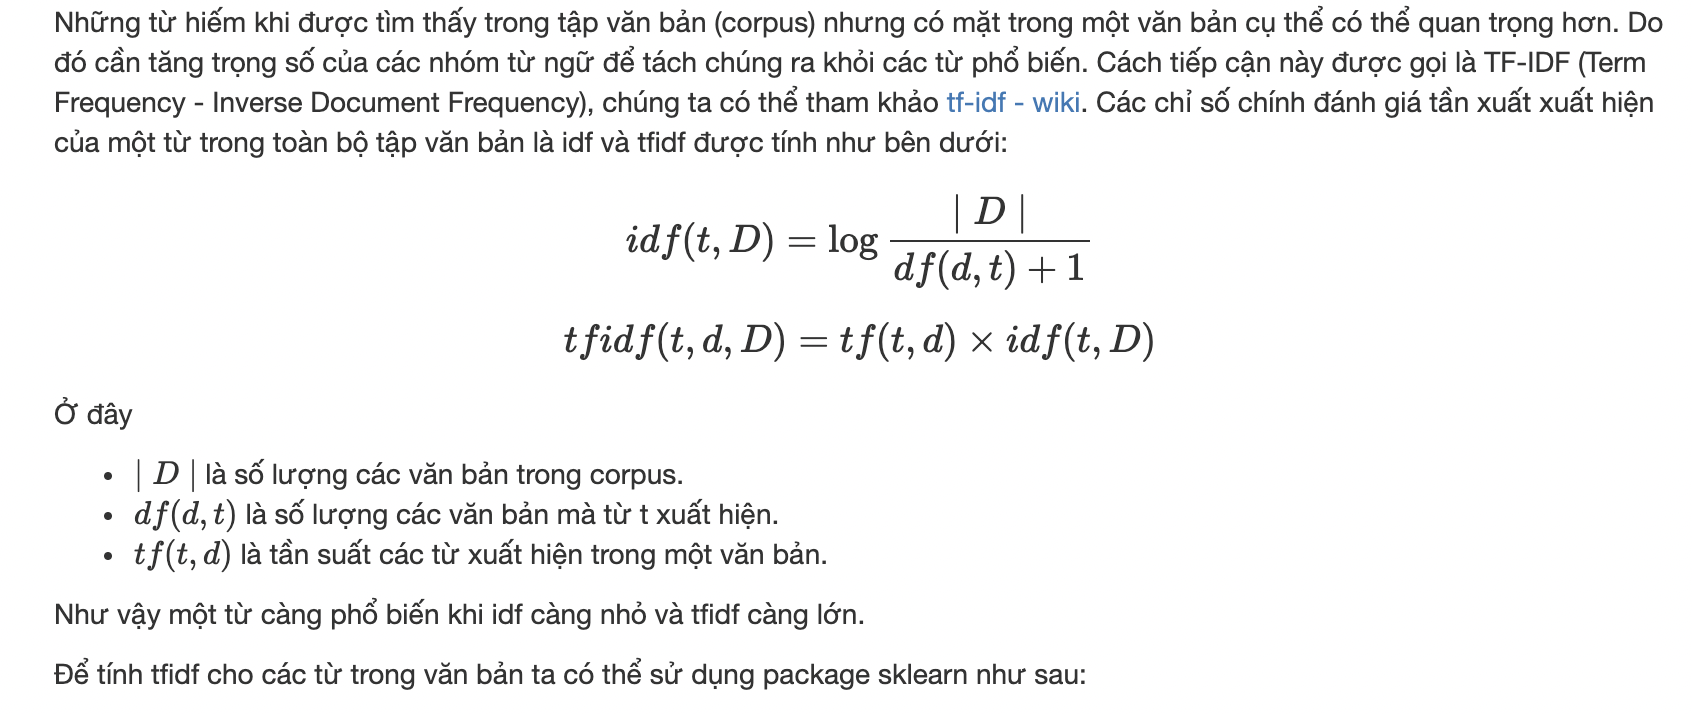

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = ['tôi thích ăn bánh mì nhân thịt',
	'cô ấy thích ăn bánh mì, còn tôi thích ăn xôi',
	'thị trường chứng khoán giảm làm tôi lo lắng',
	'chứng khoán sẽ phục hồi vào thời gian tới. danh mục của tôi sẽ tăng trở lại',
  'dự báo thời tiết hà nội có mưa vào chiều và tối. tôi sẽ mang ô khi ra ngoài']

  # Khởi tạo model tính tfidf cho mỗi từ
# Tham số max_df để loại bỏ các từ stopwords xuất hiện ở hơn 90% các câu.
vectorizer = TfidfVectorizer(max_df = 0.9)
# Tokenize các câu theo tfidf
X = vectorizer.fit_transform(corpus)
print(X)
print('words in dictionary:', vectorizer.get_feature_names())
print('X shape: ', X.shape)

  (0, 32)	0.46606680869265926
  (0, 25)	0.46606680869265926
  (0, 21)	0.3760197666579778
  (0, 0)	0.3760197666579778
  (0, 43)	0.3760197666579778
  (0, 30)	0.3760197666579778
  (1, 42)	0.30847216489176504
  (1, 4)	0.30847216489176504
  (1, 44)	0.30847216489176504
  (1, 6)	0.30847216489176504
  (1, 21)	0.2488734003359842
  (1, 0)	0.2488734003359842
  (1, 43)	0.4977468006719684
  (1, 30)	0.4977468006719684
  (2, 19)	0.3700701677555205
  (2, 16)	0.3700701677555205
  (2, 17)	0.3700701677555205
  (2, 11)	0.3700701677555205
  (2, 15)	0.29857028119389706
  (2, 3)	0.29857028119389706
  (2, 35)	0.3700701677555205
  (2, 31)	0.3700701677555205
  (3, 18)	0.2564327762776724
  (3, 36)	0.2564327762776724
  (3, 37)	0.2564327762776724
  :	:
  (3, 10)	0.2564327762776724
  (3, 33)	0.2068883492687698
  (3, 41)	0.2068883492687698
  (3, 13)	0.2564327762776724
  (3, 27)	0.2564327762776724
  (3, 29)	0.4137766985375396
  (3, 15)	0.2068883492687698
  (3, 3)	0.2068883492687698
  (4, 24)	0.25036997404247474
  (4,

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.spatial.distance import euclidean

vect = CountVectorizer(ngram_range = (3, 3), analyzer = 'char_wb')
n1, n2, n3, n4 = vect.fit_transform(['andersen', 'peterson', 'petrov', 'smith']).toarray()
euclidean(n1, n2), euclidean(n2, n3), euclidean(n3, n4)

(3.7416573867739413, 3.1622776601683795, 3.3166247903554)

####2.2 Feature Extraction in Computer Vision:


In [ ]:
# Cài đạt package pytesseract:
import sys
!{sys.executable} -m pip install pytesseract

In [ ]:
#Cài đặt tesseract:
!{sys.executable} -m pip install tesseract

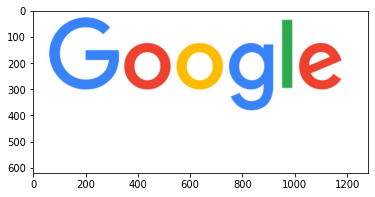

In [ ]:
from pytesseract import image_to_string
from PIL import Image
from io import BytesIO
import requests
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
##### Just a random picture from search
img = 'http://ohscurrent.org/wp-content/uploads/2015/09/domus-01-google.jpg'
img = requests.get(img)
img = Image.open(BytesIO(img.content))
#Show image
img_arr = np.array(img)
plt.imshow(img_arr)


In [ ]:
#ĐỌc ảnh từ link
img2 = requests.get('https://photos.renthop.com/2/8393298_6acaf11f030217d05f3a5604b9a2f70f.jpg')
img2 = Image.open(BytesIO(img2.content))
img2 = np.array(img2)
plt.imshow(img2)

UnidentifiedImageError: ignored

###2.3 Thông tin địa lý:
+ package: reverse_geocoder


In [ ]:
import sys
# install package reverse_geocoder
!{sys.executable} -m pip install reverse_geocoder

In [ ]:
import reverse_geocoder as revgc
revgc.search((dataset.latitude[1], dataset.longitude[1]))


[OrderedDict([('lat', '40.74482'),
              ('lon', '-73.94875'),
              ('name', 'Long Island City'),
              ('admin1', 'New York'),
              ('admin2', 'Queens County'),
              ('cc', 'US')])]

####2.4: Dữ liệu thời gian

In [ ]:
from datetime import datetime
def parser(x):
  # Để biết được định dạng strftime của một chuỗi kí tự ta phải tra trong bàng string format time
  return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

In [ ]:
dataset['created'] = dataset['created'].map(lambda x: parser(x))
#Kiểm tra định dạng time:
for i, k in zip(dataset.columns, dataset.dtypes):
  print('{}:{}'.format(i, k))

bathrooms:float64
bedrooms:int64
building_id:object
created:datetime64[ns]
description:object
display_address:object
features:object
latitude:float64
listing_id:int64
longitude:float64
manager_id:object
photos:object
price:int64
street_address:object
interest_level:object


In [ ]:
dataset.head(2)

In [ ]:
print(dataset['created'].head())

4    2016-06-16 05:55:27
6    2016-06-01 05:44:33
9    2016-06-14 15:19:59
10   2016-06-24 07:54:24
15   2016-06-28 03:50:23
Name: created, dtype: datetime64[ns]


####Như vậy biến created đã được chuyển về dạng datetime. Chúng ta có thể tạo ra một one-hot coding dựa vào hàm weekday().

In [ ]:
dataset['weekday'] = dataset['created'].apply(lambda x: x.date().weekday())
print(dataset['weekday'].head())

4     3
6     2
9     1
10    4
15    1
Name: weekday, dtype: int64


In [ ]:
#Ta có thể tạo ra một biến trả về trạng thái ngày có phải là cuối tuần bằng kiểm tra weekday() có rơi vào [5, 6] hay không.
dataset['is_weekend'] = dataset['created'].apply(lambda x: 1 if x.date().weekday() in [5, 6] else 0)
print(dataset['is_weekend'][:5])

4     0
6     0
9     0
10    0
15    0
Name: is_weekend, dtype: int64


#####Chuỗi thời gian từ website, log,…

Các hệ thống website lớn sẽ tracking lại các session của người dùng. Những thông tin được tracking bao gồm thông tin thiết bị, loại event, customer ID, … Từ customer ID chúng có thể link tới database người dùng để biết được các thông tin về giới tính, độ tuổi, tài khoản, hành vi giao dịch,…. Trong một số trường hợp một khách hàng có thể thay đổi thiết bị truy cập, do đó không phải hầu hết các trường hợp chúng ta đều map được session với Customer ID trên dữ liệu local. Tuy nhiên từ các thông tin được lưu trong Cookie về người dùng (còn gọi là user agent) cũng cung cấp cho chúng ta khá nhiều điều. Chẳng hạn như: Thiết bị truy cập, trình duyệt, hệ điều hành,… Từ thiết bị di động chúng ta cũng ước đoán được người dùng có mức thu nhập như thế nào: Sử dụng Iphone X thì khả năng cao là người có thu nhập cao, sử dụng điện thoại xiaomi khả năng là người thu nhập trung bình và thấp,…. Để phân loại các thông tin về người dùng chúng ta có thể sử dụng package user_agents trong python.

In [ ]:
# Download package user_agents
!{sys.executable} -m pip install user_agents


In [ ]:

import user_agents
# Giả định có một user agent như bên dưới
ua = 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Ubuntu Chromium/56.0.2924.76 Chrome/56.0.2924.76 Safari/537.36'
# Parser thông tin user agent
ua = user_agents.parse(ua)
# Khai thác các thuộc tính của user
print('Is a bot? ', ua.is_bot)
print('Is mobile? ', ua.is_mobile)
print('Is PC? ',ua.is_pc)
print('OS Family: ',ua.os.family)
print('OS Version: ',ua.os.version)
print('Browser Family: ',ua.browser.family)
print('Browser Version: ',ua.browser.version)

Is a bot?  False
Is mobile?  False
Is PC?  True
OS Family:  Ubuntu
OS Version:  ()
Browser Family:  Chromium
Browser Version:  (56, 0, 2924)


In [ ]:
https://phamdinhkhanh.github.io/2019/01/07/Ky_thuat_feature_engineering.html

In [ ]:
https://machinelearningcoban.com/general/2017/02/06/featureengineering/

In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import beta
from scipy.stats import shapiro
import statsmodels.api as sm 
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###4.1 Sử dụng mô hình

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

# Hồi qui theo RandomForest
rdFrt = RandomForestClassifier(n_estimators = 10, random_state = 1)
# Hồi qui theo LinearSVC
lnSVC = LinearSVC(C=0.01, penalty="l1", dual=False)
# Tạo một pipeline thực hiện lựa chọn biến từ RandomForest model và hồi qui theo logit
pipe1 = make_pipeline(StandardScaler(), SelectFromModel(estimator = rdFrt), logit)
# Tạo một pipeline thực hiện lựa chọn biến từ Linear SVC model và hồi qui theo logit
pipe2 = make_pipeline(StandardScaler(), SelectFromModel(estimator = lnSVC), logit)
# Cross validate đối với 
# 1. Mô hình logit
acc_log = cross_val_score(logit, X, y, scoring = 'accuracy', cv = 5).mean()
# 2. Mô hình RandomForest
acc_rdf = cross_val_score(rdFrt, X, y, scoring = 'accuracy', cv = 5).mean()
# 3. Mô hình pipe1
acc_pip1 = cross_val_score(pipe1, X, y, scoring = 'accuracy', cv = 5).mean()
# 3. Mô hình pipe2
acc_pip2 = cross_val_score(pipe2, X, y, scoring = 'accuracy', cv = 5).mean()

print('Accuracy theo logit:', acc_log)
print('Accuracy theo random forest:', acc_rdf)
print('Accuracy theo pipeline 1:', acc_pip1)
print('Accuracy theo pipeline 2:', acc_pip2)

NameError: ignored

###4.2: Sử dụng grid search

In [ ]:
!{sys.executable} -m pip install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector

selector = SequentialFeatureSelector(logit, scoring = 'accuracy', 
                                     verbose = 2, 
                                     k_features = 3,
                                     forward = False,
                                     n_jobs = -1)

selector.fit(X, y)

ModuleNotFoundError: ignored